In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
ppp = os.path.abspath('../../visualization')

sys.path.insert(1, p)
sys.path.insert(1, pp)
sys.path.insert(1, ppp)



In [2]:
from matplotlib import font_manager
import matplotlib as mpl
from matplotlib import font_manager as fm

# 설치된 폰트 이름과 경로 확인
for font in font_manager.fontManager.ttflist:
    if 'Helvetica' in font.name: # 'Nanum' 대신 원하는 글꼴의 일부를 입력하여 검색할 수 있습니다.
        print(font.name, font.fname)

# 직접 경로로 Helvetica 폰트 불러오기
font_path = "/System/Library/Fonts/Helvetica.ttc"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
print(f"Registered font name: {font_name}")

mpl.rcParams['font.family'] = font_name


Helvetica /System/Library/Fonts/Helvetica.ttc
Helvetica Neue /System/Library/Fonts/HelveticaNeue.ttc
Registered font name: Helvetica


In [3]:
import json
import pandas as pd
from utils.salary import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

palette = sns.color_palette("colorblind")
 

In [4]:
output_dir = './fig/'
colors = plt.get_cmap('tab20').colors 

In [5]:
# test.json 내용: [{"name":"Jack","age":26},{"name":"Ace","age":87}]
df = pd.read_json('../../visualization/result/tag/salary.json') ## pd.read_json 이용

In [6]:
tag_info = load_json("../../visualization/result/tag/tag_info.json")

In [7]:
df = df.reset_index().rename(columns={'index':'year'})

In [8]:
df = df.sort_values(by = 'year').reset_index(drop=True)

In [9]:
df

,year,clojure,f#,elixir,erlang,perl,ruby,scala,rust,go,...,zig,apex,nim-lang,raku,ada,prolog,gdscript,vb.net,micropython,zephyr-rtos
0,2019,90000.0,80000.0,76000.0,71000.0,NaN,75000,78000,72000,80000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,NaN,NaN,NaN,NaN,76000.0,71000,76000,74000,74000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,95000.0,81037.0,80077.0,80077.0,80000.0,80000,77832,77530,75669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,106644.0,95526.0,92959.0,103000.0,90073.0,93000,92780,87047,89204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,96381.0,99311.0,96381.0,99492.0,94540.0,98522,96381,87012,92760,...,103611.0,81552.0,80000.0,79448.0,71500.0,70000.0,69608.0,65000.0,NaN,NaN
5,2024,95541.0,80555.0,96000.0,100636.0,90000.0,90221,88619,76292,76433,...,75332.0,82500.0,94924.0,NaN,42584.0,43327.0,60684.0,63694.0,75184.0,64444.0


In [10]:
def get_CID_df(df, year) : 
    year_list = [year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df




In [11]:
def get_CID_ratio_df(df, year) : 
    year_list = [year-3, year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df['salary_ratio'] = filtered_df.groupby(['lang'])['salary'].transform(lambda x: x/x.shift(1) )
    filtered_df = filtered_df.dropna()

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary_ratio'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df

In [12]:
def get_CID_log_df(df, year) : 
    year_list = [year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()
    df_salary['salary'] = np.log(df_salary['salary'])

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df




In [13]:
def get_CID_ratio_rel_df(df, year) : 
    year_list = [year-3, year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    valid_langs = df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index
    filtered_df = df_salary[df_salary['lang'].isin(valid_langs)].copy()

    # 언어별로 연도 정렬 후 상대 변화율(성장률) 계산
    filtered_df.sort_values(by=['lang', 'year'], inplace=True)
    filtered_df['growth_rate'] = filtered_df.groupby('lang')['salary'].pct_change()

    # growth_rate의 이차 차분 = CID 계산
    filtered_df['CID'] = filtered_df.groupby('lang')['growth_rate'].diff()
    filtered_df['CID'] = filtered_df.groupby('lang')['CID'].diff()

    # 최종 정리: CID 계산이 가능한 연도만 남김
    filtered_df = filtered_df.dropna(subset=['growth_rate', 'CID']).reset_index(drop=True)


    return filtered_df




In [14]:
def filter_df( df, type ) :
    tot_filtered_df = pd.DataFrame()
    for year in [ 2022, 2023, 2024] : 
        if type == 'ratio' : 
            filtered_df = get_CID_ratio_df(df, year)
        elif type == 'log' : 
            filtered_df = get_CID_log_df(df, year)
        elif type == 'ratio_rel' :
            filtered_df = get_CID_ratio_rel_df(df, year)
            
        else :
            filtered_df = get_CID_df(df, year)
            
        tot_filtered_df = pd.concat([tot_filtered_df, filtered_df], axis = 0)
    
        tot_exist_df = tot_filtered_df[tot_filtered_df['lang'].isin(tot_filtered_df['lang'].value_counts()[lambda x: x == len([ 2022, 2023, 2024])].index)].copy()
        tot_exist_df=  tot_exist_df.sort_values(by = ['year', 'CID'], ascending=[False, True])
    return tot_exist_df

In [15]:
tot_df_r = filter_df(df, 'ratio')
tot_df_log = filter_df(df, 'log')
tot_df_nr = filter_df(df, 'notratio')
tot_df_rl = filter_df(df, 'ratio_rel')

[2019, 2020, 2021, 2022]
[2020, 2021, 2022, 2023]
[2021, 2022, 2023, 2024]
[2020, 2021, 2022]
[2021, 2022, 2023]
[2022, 2023, 2024]
[2020, 2021, 2022]
[2021, 2022, 2023]
[2022, 2023, 2024]
[2019, 2020, 2021, 2022]
[2020, 2021, 2022, 2023]
[2021, 2022, 2023, 2024]


In [16]:
def draw_rate_of_change_diff_plot():
    tag_list = list(tot_df_r['lang'].unique())
    x_dict = dict()
    for tag_str in tag_list:
        tags = tag_str.split("/")
        x_value = sum([int(tag_info[tag]["db_count_before_gpt"])
                        for tag in tags])
        x_dict[tags[0]] = np.log(x_value)
    return x_dict
        

In [17]:
x_value = draw_rate_of_change_diff_plot()

In [18]:
x_value_df = pd.DataFrame(list(x_value.items()), columns=['lang', 'log_db_count'])
x_value_df.head()


,lang,log_db_count
0,r,13.051454
1,javascript,14.698014
2,java,14.434387
3,kotlin,11.270408
4,typescript,12.182430


In [19]:
cid_cnt_df = pd.merge(tot_df_rl, x_value_df, on = ['lang'])

In [20]:
cid_cnt_df[cid_cnt_df['year'] ==2022]

,year,lang,salary,growth_rate,CID,log_db_count
36,2022,ruby,93000.0,0.162500,-0.144354,12.326359
37,2022,r,67734.0,0.139267,-0.056213,13.051454
38,2022,vba,62328.0,0.157975,-0.025537,12.220818
39,2022,rust,87047.0,0.122752,0.055125,10.380187
40,2022,go,89204.0,0.178871,0.058763,11.085307
41,2022,typescript,70276.0,0.187656,0.061446,12.182430
42,2022,sql,69108.0,0.229067,0.093917,13.377085
43,2022,c,67186.0,0.263275,0.097453,12.867247
44,2022,c#,69516.0,0.190995,0.109097,14.258946
45,2022,python,71105.0,0.195967,0.117085,14.518880


<Figure size 1200x600 with 0 Axes>

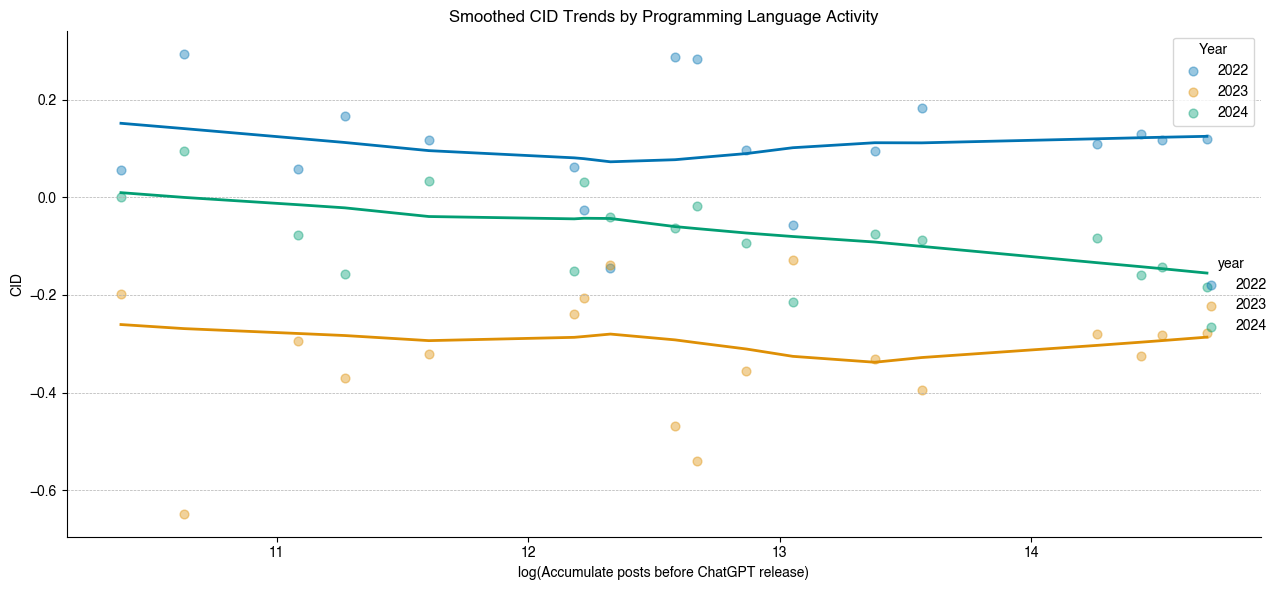

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("colorblind")

# 도화지 초기화
plt.figure(figsize=(12, 6))

# lmplot은 figure를 따로 생성하지 않음
g = sns.lmplot(
    data=cid_cnt_df,
    x="log_db_count",
    y="CID",
    hue="year",
    palette="colorblind",
    ci=95,
    lowess=True,        # 부드러운 곡선
    scatter_kws={"alpha": 0.4, "s": 40},
    line_kws={"lw": 2},
    height=6,
    aspect=2
)


# 축 라벨과 제목
plt.xlabel("log(Accumulate posts before ChatGPT release)")
plt.ylabel("CID")
plt.title("Smoothed CID Trends by Programming Language Activity")

# 범례 및 레이아웃 정리
plt.legend(title="Year")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show();


In [22]:
python_value = np.log(int(tag_info['python']["db_count_before_gpt"]))
print(python_value)

14.51887981462952


2022
2023
2024


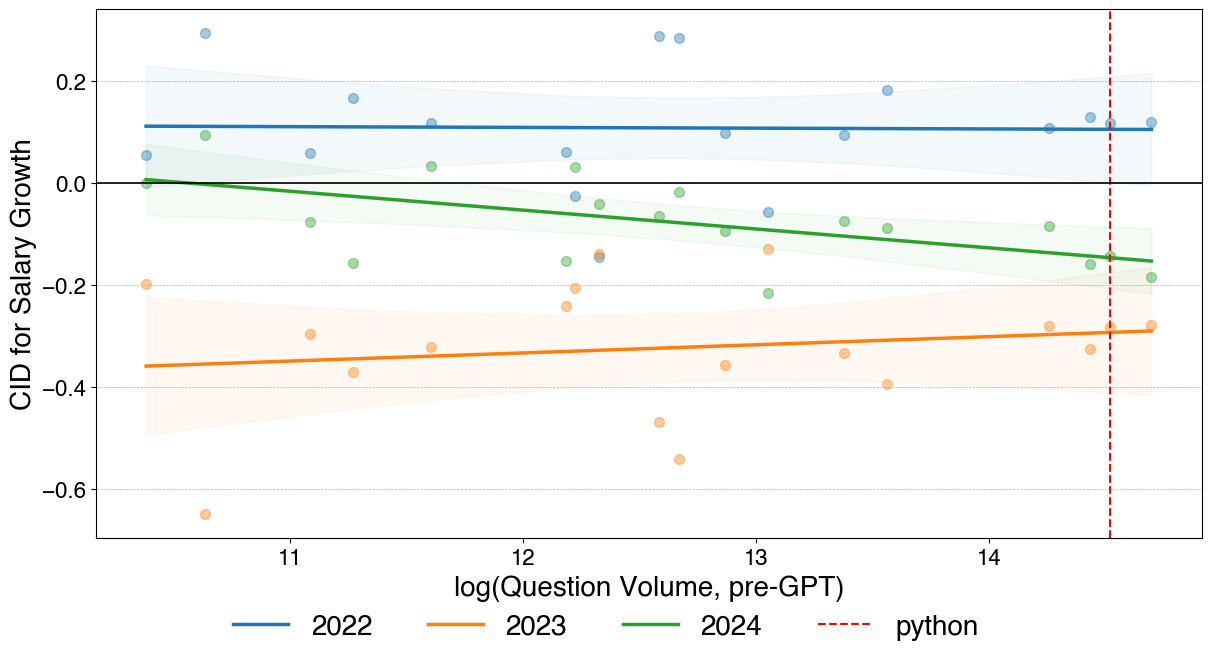

In [42]:
from statsmodels.api import OLS, add_constant
import numpy as np


fig, axs = plt.subplots(figsize = (12, 6), constrained_layout=True)
year_lines = []
py_lines = []

for i, year in enumerate(sorted(cid_cnt_df['year'].unique())):
    print(year)
    sub = cid_cnt_df[cid_cnt_df['year'] == year]
    sub = sub.sort_values("log_db_count")
    x = sub['log_db_count']
    y = sub['CID']
    
    X = add_constant(x)
    model = OLS(y, X).fit()
    pred = model.get_prediction(X)
    ci = pred.conf_int(alpha=0.05)
    mean = pred.predicted_mean
    color_idx = i*2

    # 신뢰구간 - 연하게
    axs.fill_between(x, ci[:, 0], ci[:, 1], color=colors[color_idx], alpha=0.05)

    # 선 - 진하게
    line, = axs.plot(x, mean, color=colors[color_idx], lw=2.5, label=str(year))
    year_lines.append(line)
    # 점 - 흐리게
    axs.scatter(x, y, color=colors[color_idx], s=50, alpha=0.4)

line = axs.axvline(x=python_value, color='r', linestyle='--', linewidth=1.5, label='python')
axs.axhline(y=0, color='black', linewidth=1.2)

handles, labels = axs.get_legend_handles_labels()
labels.append("ChatGPT Release")
fig.legend(
    handles=handles,
    labels=labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=4,
    fontsize=20,
    frameon=False
)


# py_lines.append(line,)


# legend1 = axs.legend(handles=year_lines, title='Year', loc='upper left', bbox_to_anchor=(1.02, 1))
# axs.add_artist(legend1)  # 첫 번째 레전드 고정

# # 3. 두 번째 레전드 (하위 5개)
# legend2 = axs.legend(handles=py_lines, title='Language', loc='lower left', bbox_to_anchor=(1.02, 0.65))


plt.xlabel("log(Question Volume, pre-GPT)", fontsize=20)
plt.ylabel("CID for Salary Growth", fontsize=20)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)

# plt.title("Yearly Trends for Salary CID by Data Availability of Programming Language")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.savefig(f"{output_dir}Result_Fig12.png", dpi=300, bbox_inches='tight')
plt.show()
